In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df_turistas_civitatis = pd.read_pickle(r'C:\Users\mituc\Ironhack\Curso\IronLabs\Proyecto-1\data\numero_turistas_fecha.pkl')

In [16]:
df_turistas_admon = pd.read_pickle(r'C:\Users\mituc\Ironhack\Curso\IronLabs\Proyecto-1\data\admon_cividates.pkl')

We are going to visualize the data on a logarithmic scale for several reasons:

    - The data frames have a very different range of values, a logarithmic scale will help us to compare both lineplots.
    
    - As we are working with time-series, the log scale will help us visualise fractional changes over time more accurately than a linear scale.

[None]

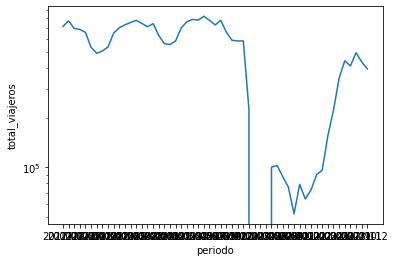

In [25]:
fig1 = sns.lineplot(data=df_turistas_admon, x='periodo', y='total_viajeros')
fig1.set(yscale='log')

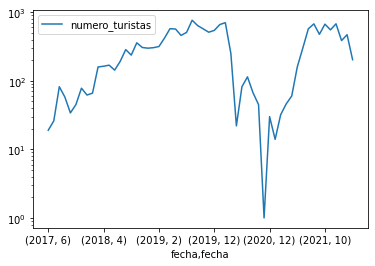

In [188]:
df_turistas_civitatis.plot()
plt.yscale('log')

# Conclusions

In the first graph, corresponding to the data of the tourists who have visited Barcelona according to the csv given by the goverment, we can clearly see the yearly curve whith its lowest point corresponding to winter season and the highest to summertime. During the covid crisis there is a flat of several months due to the fact that travels whithout a strong justification were strictly forbidden, so there was no tourist at all.
After the lockdown, tourism has been recovering bit by bit, but is still far from the uniform and systematic curve that we had before the crisis.

In the second graph, corresponding to the data of the tourists who have done the civitatis' freetour in Barcelona since they started it in June 2017, we observe the constant growth of the company up to the covid-19 crisis, but unlike the graph of the tourist given by the goverment, civitatis doesn't show a flat in the data, but just a descent corresponding to the complete lockdown that lasted from april 2020 to June 2020, followed by an inmediate recuperation as soon as citizens were allowed to take a walk.
In fact, we can constate the they have recover the same busisness volume they have before covid.

**But, why is that?**

In general, the cultural offer in tourist industry in Spain is focus on foreing tourists coming from non-spanish speaking countries, with an accent on anglo-saxon tourists. You can easely check this having a walk through the gothic quarter in Barcelona or around Sagrada Familia, you'll listen barely no catalan or spanish, but english.
Civitatis, on the contrary, focused its marketing firstly on spaniards and secondly on spanish speaking countries. This might seemed a weird strategy from an economical point of view as the welthiest clients come from northen countries, but the covid crisis proved to by the right choice.
While most of the industry had to stop as there was no foreings coming to Barcelona, Civitatis was well settled in the minds of locals, who also love to do cultural activities in their own city although they are not considered as tourist by the administration, so not reflected in the official data. That's why they could restart the tours as soon as having a walk with security measures was allowed. A little later travels between cities inside the country were allowed and they took profit of the previous years marketing focused on spanish people and as borders reopened, they recovered their clients although Barcelona in general is still far from the number it had before covid.